<a href="https://colab.research.google.com/github/Aravind412/Criminal-detection-using-Deep-learning/blob/Feature-extraction/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
from keras.models import load_model
import mtcnn
print(mtcnn.__version__)
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

0.1.0


In [ ]:
model = keras.models.load_model("facenet_keras.h5")

2022-03-21 00:53:40.594608: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-21 00:53:40.595125: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.
/Users/kushidhar/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Note
- To predict an embedding, first the pixel values of the image need to be suitably prepared to meet the expectations of the FaceNet model. This specific implementation of the FaceNet model expects that the pixel values are standardized.

In [ ]:
def get_embedding(model,face_pixels):
    face_pixels = face_pixels.astype('float32')
    mean,std= face_pixels.mean(),face_pixels.std()
    face_pixels = (face_pixels-mean)/std
    samples = np.expand_dims(face_pixels,axis= 0)
    y_pred = model.predict(samples)
    return y_pred[0]

In [ ]:
data = np.load('dataset.npz')
trainX,trainy,testX,testy = data['arr_0'],data['arr_1'],data['arr_2'],data['arr_3']
print("Loaded :",trainX.shape,trainy.shape,testX.shape,testy.shape)
model = keras.models.load_model("facenet_keras.h5")

Loaded : (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)


In [ ]:
newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model,face_pixels)
    newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)

In [ ]:
newTrainX.shape

(93, 128)

In [ ]:
testX.shape

(25, 160, 160, 3)

In [ ]:
newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model,face_pixels)
    newTestX.append(embedding)

In [ ]:
newTestX = np.asarray(newTestX)

In [ ]:
print(newTestX.shape)

(25, 128)


In [ ]:
np.savez_compressed("Embeddings_dataset",newTrainX,trainy,newTestX,testy)

# Data Preparing

In [ ]:
model = load_model('facenet_keras.h5')

In [ ]:
# takes an square color image of shape 160 X,160
model.inputs

[<tf.Tensor 'input_1_2:0' shape=(None, 160, 160, 3) dtype=float32>]

In [ ]:
# model outputs an image of embedding asa 128 element vector
model.outputs

[<tf.Tensor 'Bottleneck_BatchNorm_2/cond/Identity:0' shape=(None, 128) dtype=float32>]

# Detect Faces using MTCNN
- use MTCNN : Multi-Task Cascaded Convolutinal Neural Network
- state of the art deep learning model for face_detection

In [ ]:
image = Image.open('kushidhar.jpeg')
# load image as a Numpy array using PIL library and open() function
image = image.convert('RGB') # Just incase the image has an alpha channel or black and white
pixels = np.asarray(image)

In [ ]:
print(image)

<PIL.Image.Image image mode=RGB size=1280x720 at 0x7F9422F3F710>


In [ ]:
detector = mtcnn.MTCNN()
results = detector.detect_faces(pixels)

In [ ]:
results

[{'box': [518, 189, 338, 455],
  'confidence': 0.9999517202377319,
  'keypoints': {'left_eye': (617, 370),
   'right_eye': (773, 373),
   'nose': (696, 492),
   'mouth_left': (617, 527),
   'mouth_right': (760, 526)}}]

In [ ]:
def extract_face(file_name,required_size=(160,160)):
    image = Image.open(file_name)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    detector = mtcnn.MTCNN()
    results = detector.detect_faces(pixels)
    x1,y1,width,height = results[0]['box']
    x1,y1 = abs(x1),abs(y1)
    x2,y2 = x1+width,y1+height
    face = pixels[y1:y2,x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

In [ ]:
pixels = extract_face("kushidhar.jpeg")

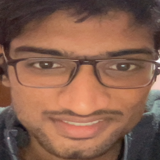

In [ ]:
Image.fromarray(pixels)

In [ ]:
folder = "archive/train/ben_afflek/"

In [ ]:
import os

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


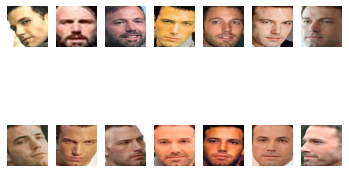

In [ ]:
i = 1
for filename in os.listdir(folder):
    path = folder+filename
    face = extract_face(path)
    print(i,face.shape)
    plt.subplot(2,7,i)
    plt.axis('off')
    plt.imshow(face)
    i+=1
plt.show()

In [ ]:
def load_faces(directory):
    faces = list()
    for filename in os.listdir(directory):
        path = directory+filename
        face = extract_face(path)
        faces.append(face)
    return faces

In [ ]:
import os
def load_dataset(directory):
    X,y = list(),list()
    for subdir in os.listdir(directory):
        path = directory+subdir+"/"
        if not os.path.isdir(path):
            continue
        faces = load_faces(path)
        labels = [subdir for _ in range(len(faces))]
        print(">Loaded %d examples for class: %s" %(len(faces),subdir))
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X),np.asarray(y)

In [ ]:
trainX,trainy = load_dataset("archive/train/")
print(trainX.shape,trainy.shape)

>Loaded 14 examples for class: ben_afflek
>Loaded 19 examples for class: madonna
>Loaded 17 examples for class: elton_john
>Loaded 22 examples for class: mindy_kaling
>Loaded 21 examples for class: jerry_seinfeld
(93, 160, 160, 3) (93,)


In [ ]:
testX,testy = load_dataset("archive/val/")
print(testX.shape,testy.shape)

>Loaded 5 examples for class: ben_afflek
>Loaded 5 examples for class: madonna
>Loaded 5 examples for class: elton_john
>Loaded 5 examples for class: mindy_kaling
>Loaded 5 examples for class: jerry_seinfeld
(25, 160, 160, 3) (25,)


In [ ]:
np.savez_compressed("dataset.npz",trainX,trainy,testX,testy)